In [71]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, minimize_scalar
import math
from scipy.interpolate import interp1d

In [26]:
alpha = 0.5
N = 1000000
S0 = 990000
t0, tf = 0, 25
beta = 0.3
I0=7000
R0 = 3000

In [27]:
def dsdt(t, s):
    return -alpha * s

In [28]:
soln = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)

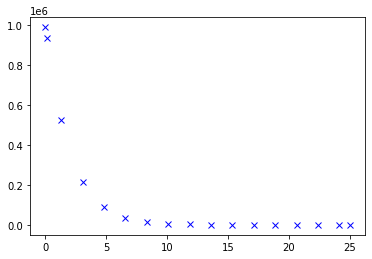

In [29]:
st, sy = soln.t, soln.y[0]
z = soln.sol
plt.plot(st, sy, 'x', color='b')

In [30]:
def expon(t,s0):
  return s0*math.e**(-alpha*t)

In [31]:
def diff(p, s, t):
  s0 = p
  return s-expon(t,s0)

In [32]:
s0 = 1
aprx, _ = leastsq(diff, s0, args=(sy,st))

In [33]:
aprx

array([990020.4192779])

In [34]:
s_y = aprx[0]*math.e**(-alpha*st)

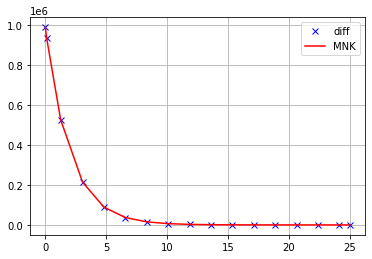

In [35]:
plt.grid()
plt.plot(st, sy, 'x', color='b', label = 'diff')
plt.plot(st, s_y, 'r', label='MNK')
plt.legend()

In [36]:
def didt(t, i):
    return alpha*z(t)-beta*i

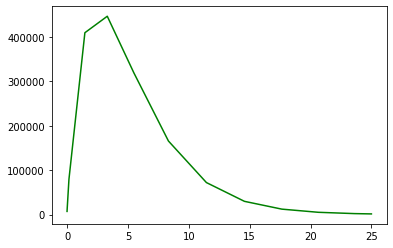

In [37]:
soln1 = solve_ivp(didt, (t0, tf), [I0], dense_output=True)
it, iy = soln1.t, soln1.y[0]
k = soln1.sol
plt.plot(it, iy, color='g', label='solve_ivp')
plt.show()

hw5

In [38]:
def exponi(t, i0, s0):
  return (i0+alpha*s0 *t)*math.e**(-alpha*t)

In [39]:
def diffi(p, i, t):
  i0, s0 = p
  return i - exponi(t,i0, s0)

In [40]:
p = (2, 1)
aprx1, _ = leastsq(diffi, p, args=(iy,it))

In [41]:
aprx1

array([ -10652.03607588, 1370247.42846488])

In [42]:
i_y= (aprx1[0]+alpha*aprx1[1]*it)*math.e**(-alpha*it)

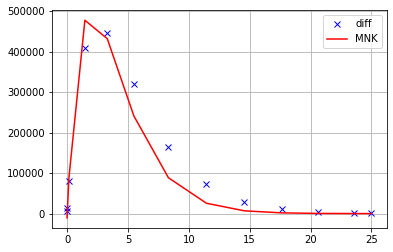

In [67]:
plt.grid()
plt.plot(it, iy, 'x', color='b', label = 'diff')
plt.plot(it, i_y, 'r', label='MNK')
plt.legend()

интерполяция функции S

In [45]:
s_int = interp1d(sy, st, kind='cubic')

In [46]:
s_yi = aprx[0]*math.e**(-alpha*it)
s_yi, sy


(array([9.90020419e+05, 9.83015351e+05, 9.15633723e+05, 4.75826887e+05,
        1.89693253e+05, 6.36033089e+04, 1.53808298e+04, 3.23131015e+03,
        6.78855784e+02, 1.45914344e+02, 3.26455977e+01, 7.41777542e+00,
        3.68946274e+00]),
 array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]))

In [47]:
def exponi(t, i0):
  return (i0+alpha*(s_yi/math.e**(-alpha*t)) *t)*math.e**(-alpha*t)

In [48]:
def diffi(p, i, t):
  i0 = p
  return i - exponi(t,i0)

In [49]:
p = (1)
aprx1, _ = leastsq(diffi, p, args=(iy,it))

In [50]:
aprx1

array([27954.87784355])

In [51]:
i_y1= (aprx1[0]+alpha*(s_yi/math.e**(-alpha*it)) *it)*math.e**(-alpha*it)
i_y1

array([2.79548778e+04, 3.47373047e+04, 9.73738171e+04, 3.62060547e+05,
       3.18789741e+05, 1.76390849e+05, 6.44893633e+04, 1.85899682e+04,
       4.96468199e+03, 1.29144375e+03, 3.37816890e+02, 8.77510839e+01,
       4.62224623e+01])

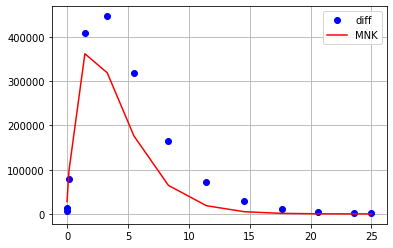

In [52]:
plt.grid()
plt.plot(it, iy, 'o', color='b', label = 'diff')
plt.plot(it, i_y1, color = 'r', label='MNK')
plt.legend()

R

In [53]:
def drdt(t, r):
    return (N-r-z(t))*beta

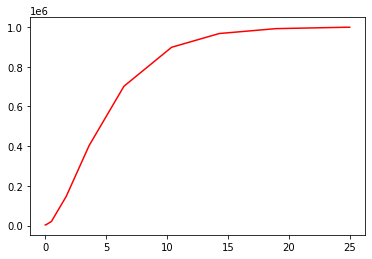

In [54]:
soln2 = solve_ivp(drdt, (t0, tf), [R0], dense_output=True)
rt, ry = soln2.t, soln2.y[0]
kr = soln2.sol
plt.plot(rt, ry, color='r', label='solve_ivp')
plt.show()

hw5

In [55]:
def exponr(t, s0, io):
  return N-s0*math.e**(-alpha*t)-(io+alpha*s0*t)*math.e**(-alpha*t)

In [56]:
def diffr(p, r, t):
  s0, io = p
  return r - exponr(t, s0, io)

In [57]:
p = (1, 1)
aprx2, _ = leastsq(diffr, p, args=(ry, rt))

In [58]:
aprx2[1]

-368640.6583246372

In [59]:
r_y1 = N-aprx2[0]*math.e**(-alpha*rt)-(aprx2[1]+alpha*aprx2[0]*rt)*math.e**(-alpha*rt)

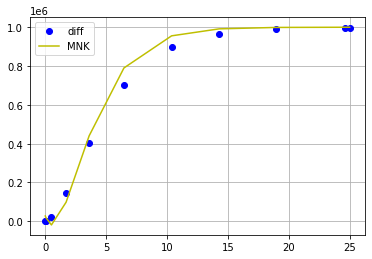

In [60]:
plt.grid()
plt.plot(rt, ry, 'o', color='b', label = 'diff')
plt.plot(rt, r_y1, color = 'y', label='MNK')
plt.legend()

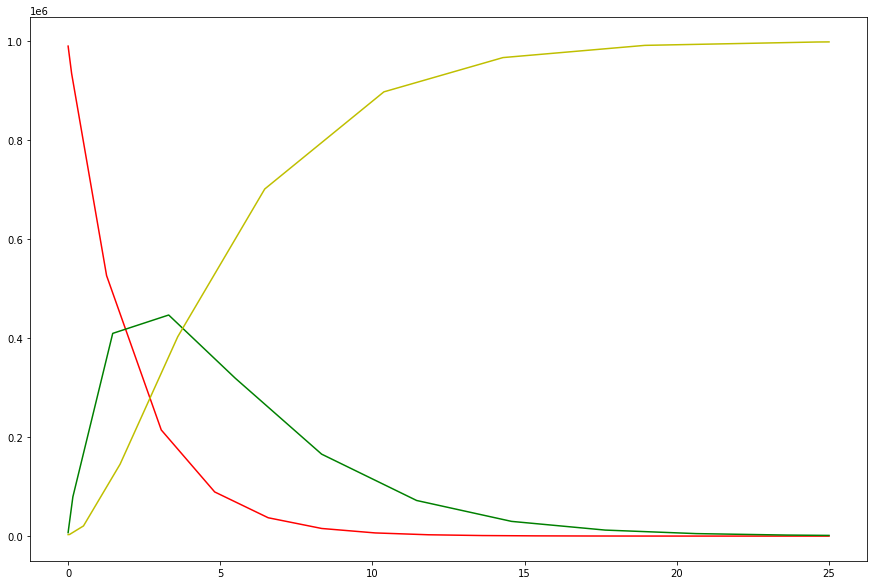

In [64]:
plt.figure(figsize=(15,10))
plt.plot(st, sy, 'r', it, iy, 'g', rt, ry, 'y')

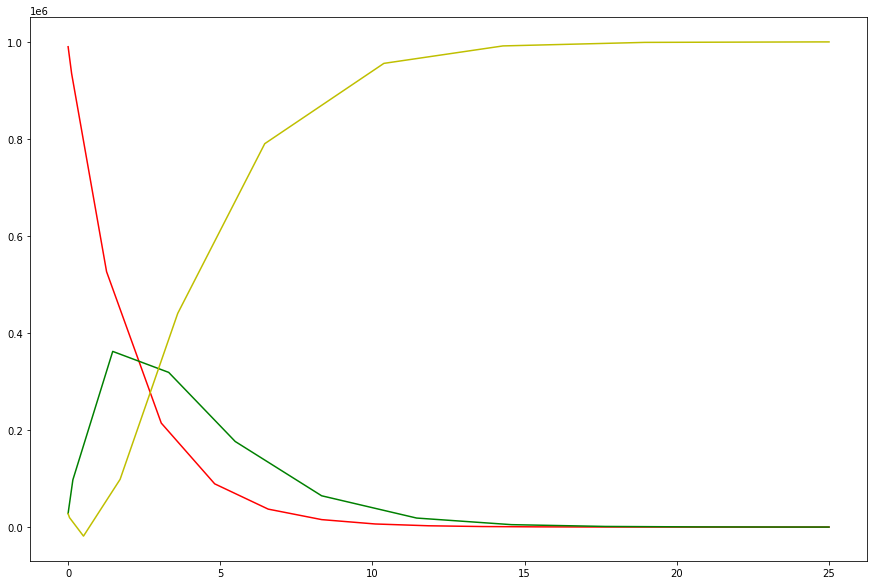

In [69]:
plt.figure(figsize=(15,10))
plt.plot(st, s_y, 'r', it, i_y1, 'g', rt, r_y1, 'y')

Найти время tmax, при котором число инфекционных индивидов максимально. 

In [ ]:
i0

In [91]:
def iii(x):
  return (I0+alpha*S0*x)*math.e**(-alpha*x)

In [92]:
result = minimize_scalar(lambda x: -iii(x), bracket=(0.5, 2, 5))

In [93]:
result

     fun: -366784.9284305365
    nfev: 14
     nit: 10
 success: True
       x: 1.9858586133447607